IMPORTING LIBRARIES

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.express as px

In [44]:
df = pd.read_csv("/content/survey.csv")

In [45]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


This dataset contains the following data (column names):

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

 **Viewing the shape of the datafrome**

In [46]:
df.shape

(1259, 27)

In [47]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


Information about the DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Viewing all columns in the dataframe

In [49]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

##AGE COLUMN

Check if there are any unnatural age values

In [50]:
for i in range(df.shape[0]):
    if df['Age'][i]>100 or df['Age'][i]<1:
        #df.drop(labels=[i],axis=0,inplace=True)
        print('yes')

yes
yes
yes
yes
yes


Viewing the age values

In [51]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Remove unnatural age values

In [52]:
index_names = df[ (df['Age'] >= 110) | (df['Age'] <= 0)].index
df.drop(index_names,inplace=True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

Counting  unique values of age. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [53]:
df['Age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
11     1
8      1
72     1
65     1
53     1
58     1
61     1
62     1
5      1
Name: Age, dtype: int64

##COUNTRY COLUMN

In [54]:
df['Country'].value_counts()

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Italy                       7
Poland                      7
Sweden                      7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Russia                      3
Mexico                      3
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Denmark                     2
Japan                       1
Czech Republic              1
Latvia                      1
Norway                      1
Spain     

##GENDER COLUMN

Viewing gender column before preprocessing



In [55]:
df['Gender'].value_counts()

Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Guy (-ish) ^_^                                      1
Female (cis)                                        1
non-binary                                          1
femail                      

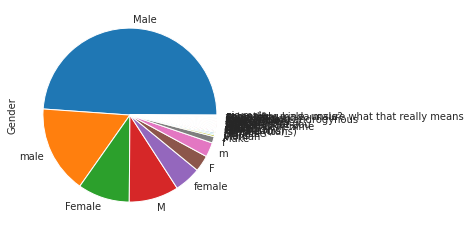

In [56]:
df['Gender'].value_counts().plot(kind='pie')

Notations used in gender column

In [57]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

PREPROCESSING GENDER COLUMN

In [58]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

After preprocessing gender column

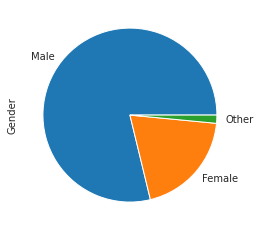

In [59]:
df['Gender'].value_counts().plot(kind='pie')

In [60]:
df['Gender']

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: Gender, Length: 1254, dtype: object

Kernel Density Estimation plot 

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Other     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

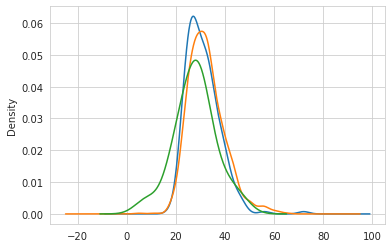

In [61]:
df.groupby('Gender').Age.plot(kind='kde')

Histogram for gender column

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Other     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

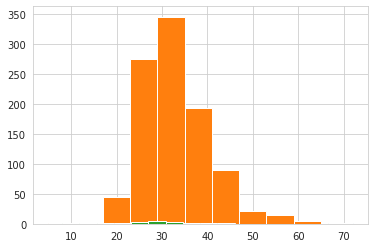

In [62]:
df.groupby('Gender').Age.hist()

Frequency for age column

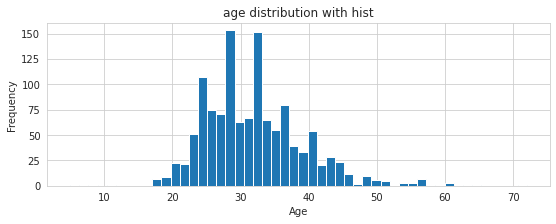

In [63]:
plt.figure(figsize = (9,3))
plt.hist(df['Age'], bins = 50)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("{} distribution with hist".format('age'))
plt.show()

Calculating the total number of missing values in each column of the DataFrame

In [64]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                263
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1091
dtype: int64

indexes

In [65]:
#indexes=[i for i in range(df.shape[0])]

##LEAVE COLUMN

In [66]:
df['leave'].value_counts()

Don't know            561
Somewhat easy         266
Very easy             205
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

In the below plot column 'leave' is grouped  is represented as a rectangular mark.

In [67]:
temp_grp_df = df.groupby('leave').count().reset_index(drop=False)
fig = px.bar(temp_grp_df, y='Timestamp',  x='leave',labels={'Timestamp':'Count'}, title='Ease of Leave',orientation='v')
fig.show()

People with family history of metal illnes  grouped by treatment sought

In [68]:
temp_grp_df = df.groupby(['family_history','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, x='family_history', y='Age', labels={'Age':'Count'}, orientation='v', color='treatment',title='People with Family History of Mental Illness Grouped by Treatment Sought' ,barmode='group')
fig.show()

In [69]:
temp_grp_df = df.groupby(['mental_health_consequence','phys_health_consequence','mental_vs_physical']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, x='mental_health_consequence', y='Age', labels={'Age':'Count'}, orientation='v', color='phys_health_consequence', facet_col='mental_vs_physical',barmode='group')
fig.show()

Viewing comments after droping rows with missing values

In [70]:
for i in df['comments'].dropna():
    print(i)

I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.
I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. 
My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.
Relatively new job. Ask again later
Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better
I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental health concerns.
Our health plan has covered my psychotherapy and my ant

In [71]:
pip install --upgrade plotly

When the argument of color corresponds to non-numerical data(here yes/no), discrete colors are used.Coulmn - country is grouped and is represented as a sector of the treemap.

In [72]:
temp_grp_df = df.groupby(['Country','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.treemap(temp_grp_df,path=['Country', 'treatment'],  color='treatment', values='Age',labels={'Age':'Count'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [73]:
def bar_plot(categ_var):
    """
        input: variable ex: "anonymity"
        output: bar plot & value count
    """
    # get feature
    var = df[categ_var]
    # count number of categorical variable
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")

s

Bar plot for self employed,famoly history.tech_company,phy_health_consquence,supervisor

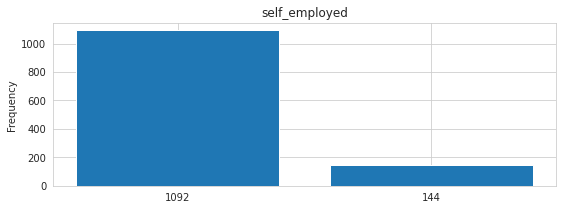

self_employed:
No     1092
Yes     144
Name: self_employed, dtype: int64


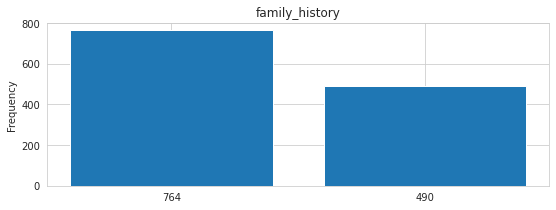

family_history:
No     764
Yes    490
Name: family_history, dtype: int64


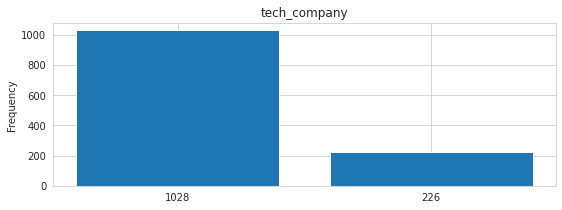

tech_company:
Yes    1028
No      226
Name: tech_company, dtype: int64


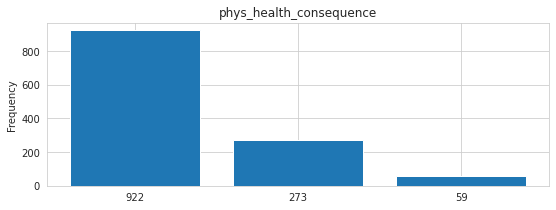

phys_health_consequence:
No       922
Maybe    273
Yes       59
Name: phys_health_consequence, dtype: int64


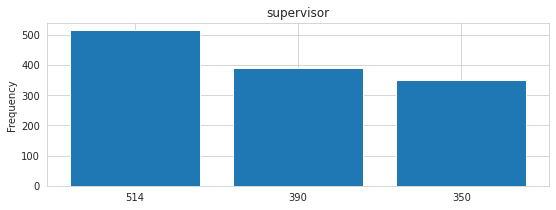

supervisor:
Yes             514
No              390
Some of them    350
Name: supervisor, dtype: int64


In [74]:
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor"]
for c in categorical_vars:
    bar_plot(c)

Treatment for a mental health condition

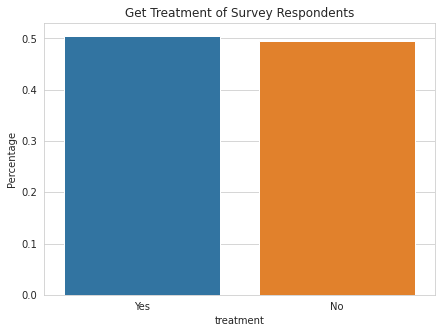

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Get Treatment of Survey Respondents')
plt.show()

Difference of ages between respondents that get treatment and no treatment.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



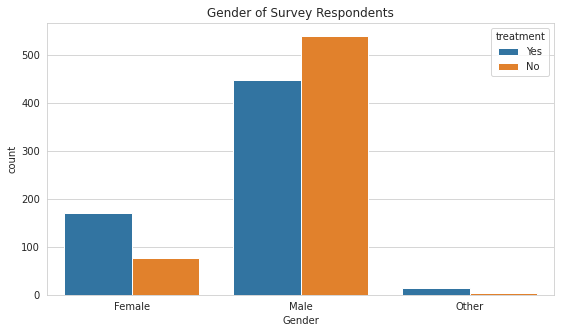

In [76]:
plt.figure(figsize = (20,5))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

##COUNTRY COLUMN

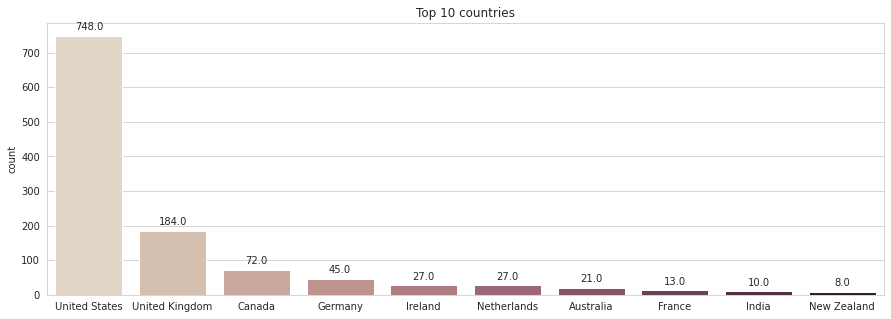

In [78]:
country_count = df.Country.value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'Country': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 countries')

State

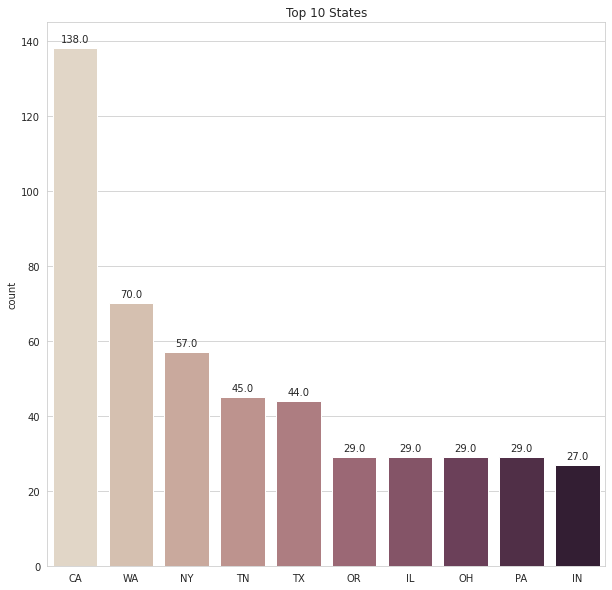

In [79]:
state_count = df.state.value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'state': 'count'})
plt.figure(figsize=(10,10))
ax = sns.barplot(x=state_count.index, y='count', data=state_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 States')

NO OF EMPLOYEES

In [80]:
df['no_employees'].value_counts()


6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64

TREATEMENT

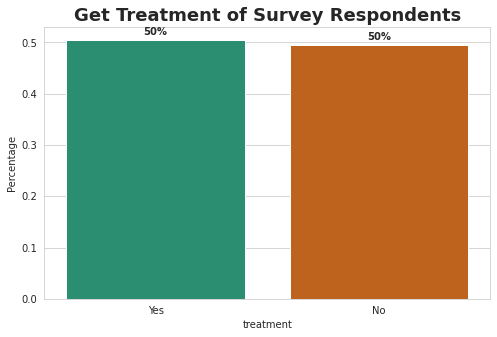

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


Work_interfere

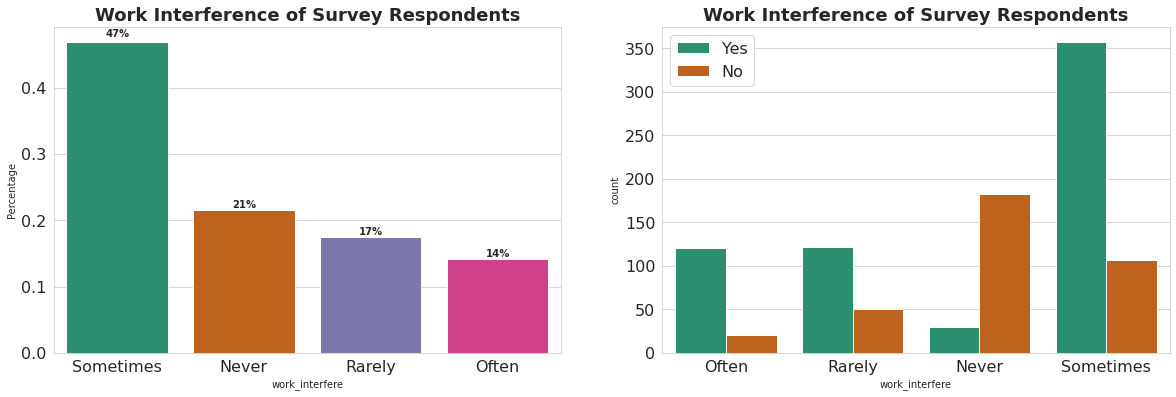

In [95]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['work_interfere'], hue = df['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Wellness program

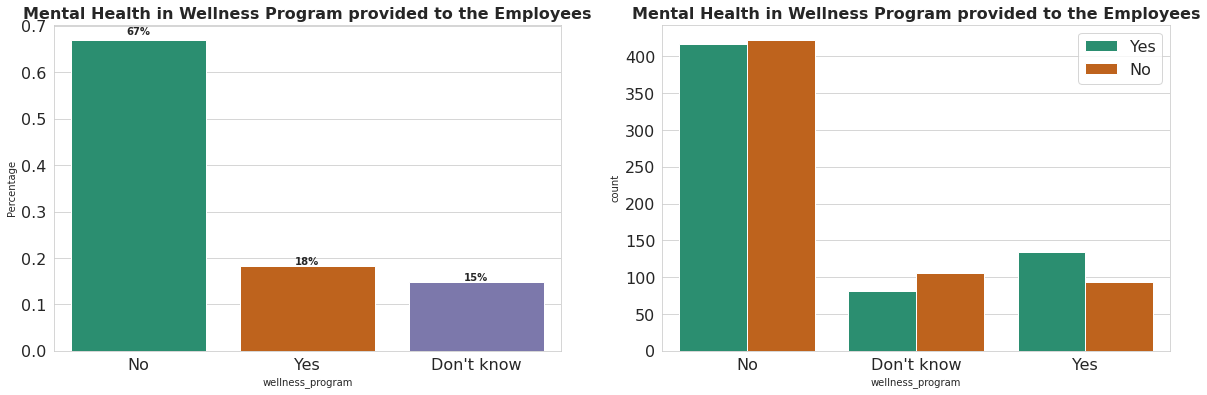

In [96]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['wellness_program'], hue = df['treatment'], palette='Dark2')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)